# Student Performance Inicator

### Life cycle of Machine Learning Project

##### Understanding the problem Statement
##### Data Collection
##### Data checks to perform
##### Exploratory data analysis
##### Data Pre-Processing 
##### Model Training 
##### Choose best model

1) Problem Statement:
    This project understands how the student's performance is 
    afftected by other variables such as gender, Ethnicity

2) Data Collection :
    Data Source - Kaggle

2.1) Data importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

2.2) Dataset Information:

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

### 3) Data Check to perform 

Check Missing values

Check Duplicate

Check data types 

Check the number of unique values of each column

check statistics of dataset

check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Checking the number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
## Checking stats

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# 3.7 Exploring data
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical feature : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical feature : {}".format(len(categorical_features),categorical_features))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df["total_score"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
print(f'number of students with full marks in math: {math_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in reading: {reading_full}')

number of students with full marks in math: 7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()
print(f'number of students with less than 20 marks in math: {math_less_20}')
print(f'number of students with less than 20 marks in writing: {writing_less_20}')
print(f'number of students with less than 20 marks in reading: {reading_less_20}')

number of students with less than 20 marks in math: 4
number of students with less than 20 marks in writing: 3
number of students with less than 20 marks in reading: 1


## Insights

From above values we get students have performed the worst in Maths
Best performance is in reading section

### 4. Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion

Histogram

Kernel Distribution Function(KDE)

### 4.1.1 Histogram & KDE


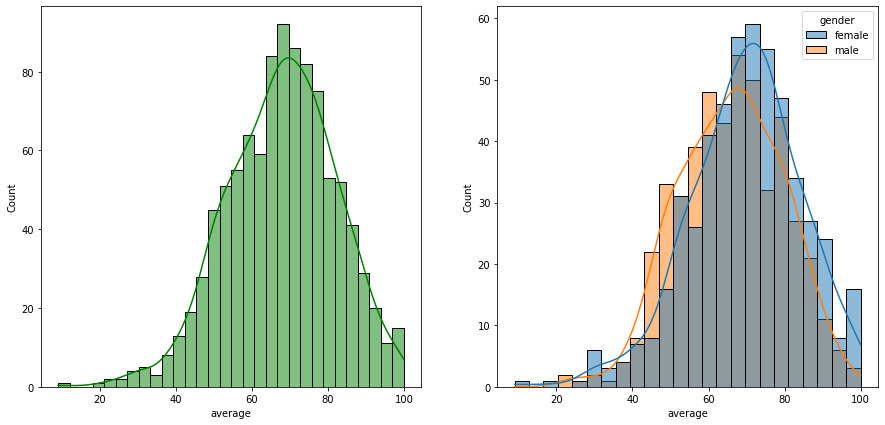

In [17]:
fig,axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

### Insights 

Female students tend to perform well then male friends

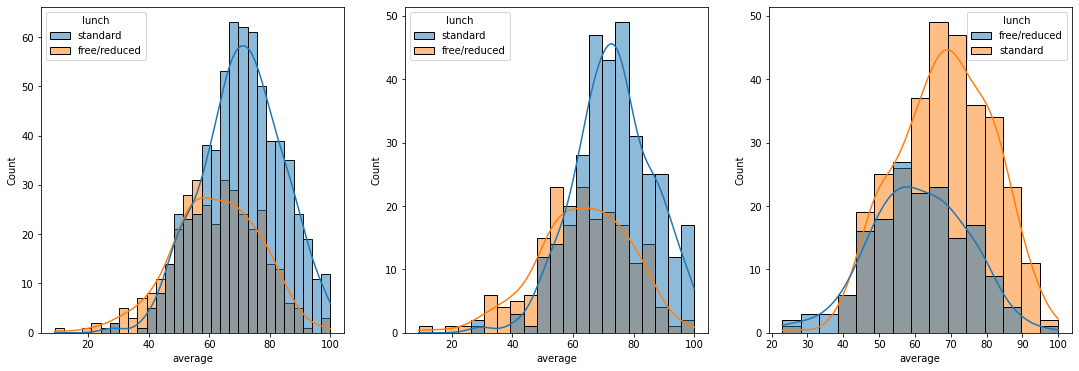

In [18]:
fig,axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

Standard lunch helps perform well in exams

Standard lunch helps perform well in exams be it a male or female 

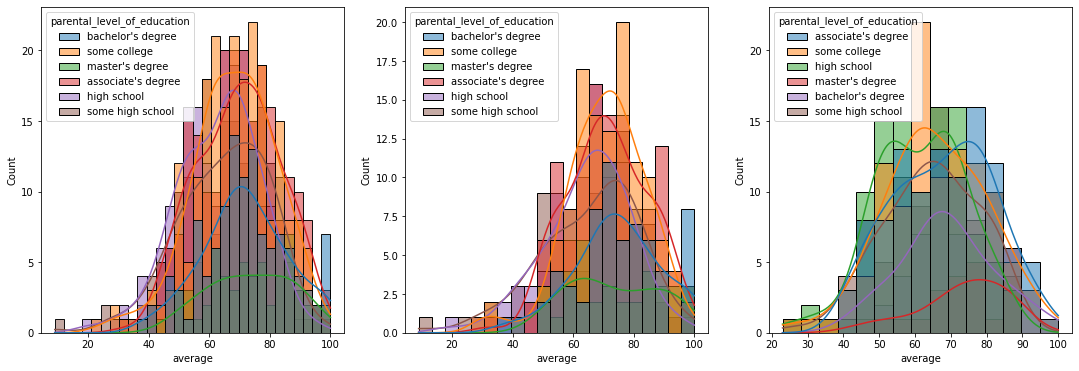

In [19]:
fig,axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

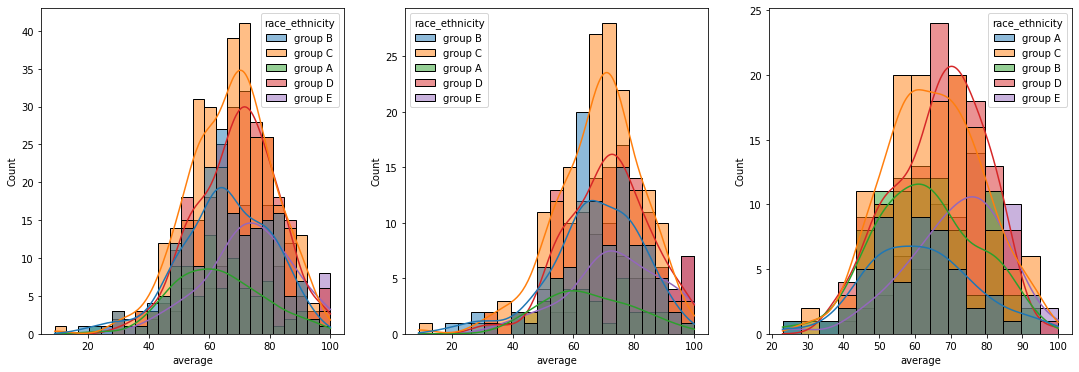

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### 4.3 Multivariate analysis using pieplot

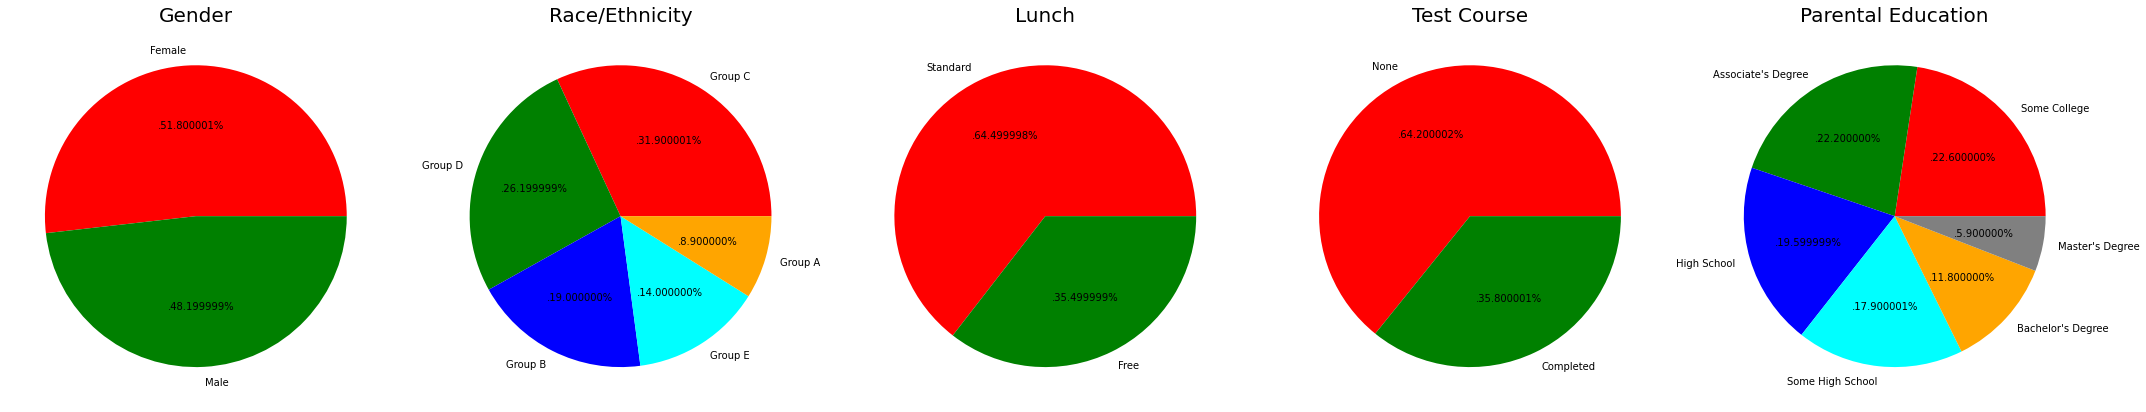

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN

     How is distribution of Gender ?
     Is gender has any impact on student's performance ?



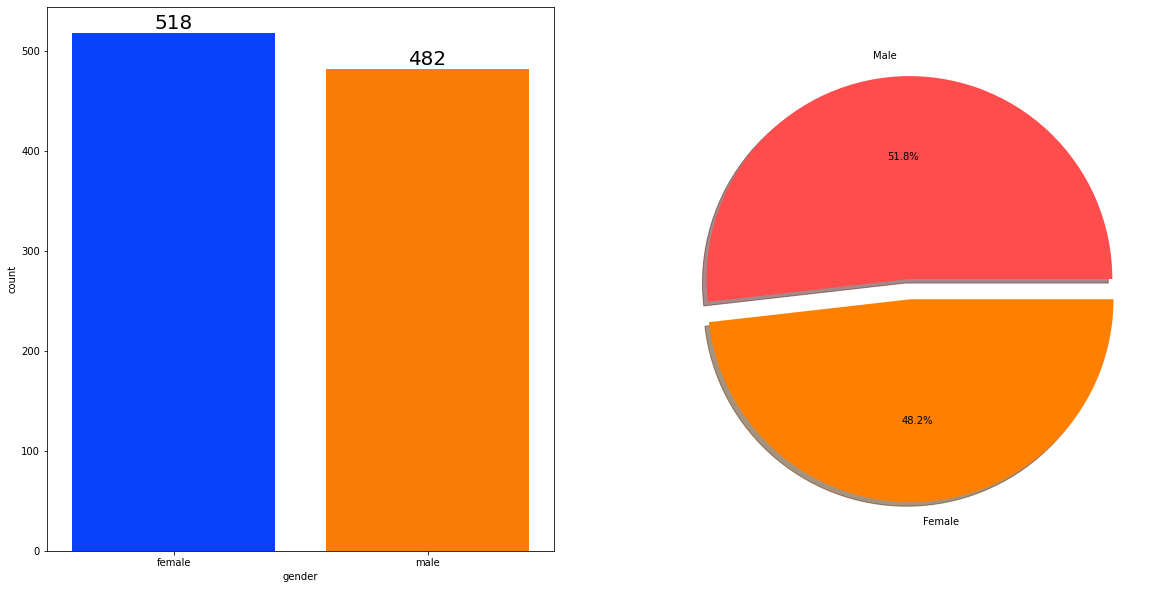

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


### Insights

    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)



### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [23]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


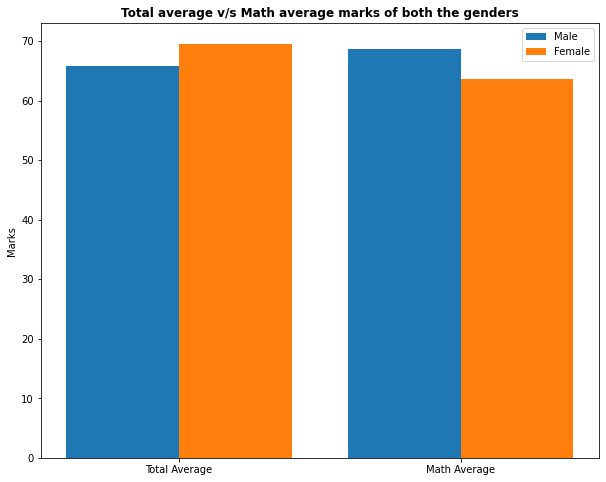

In [24]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

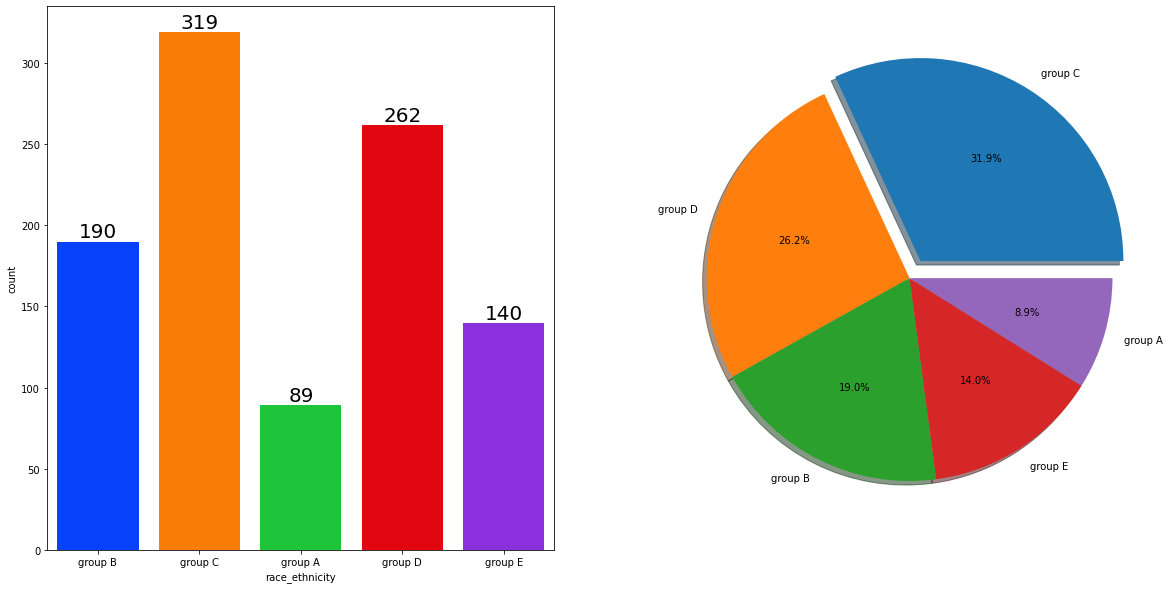

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

### Checking Outliers

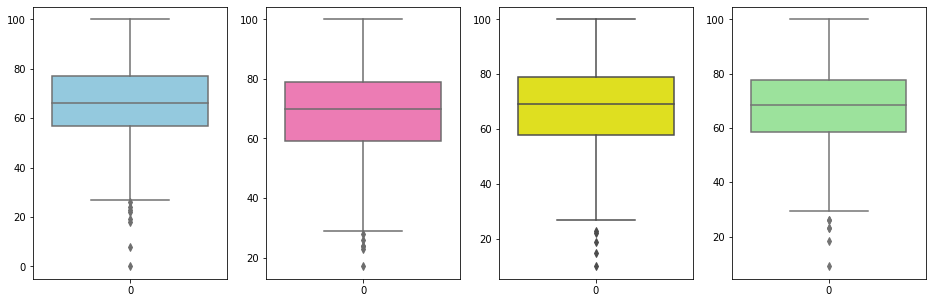

In [26]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

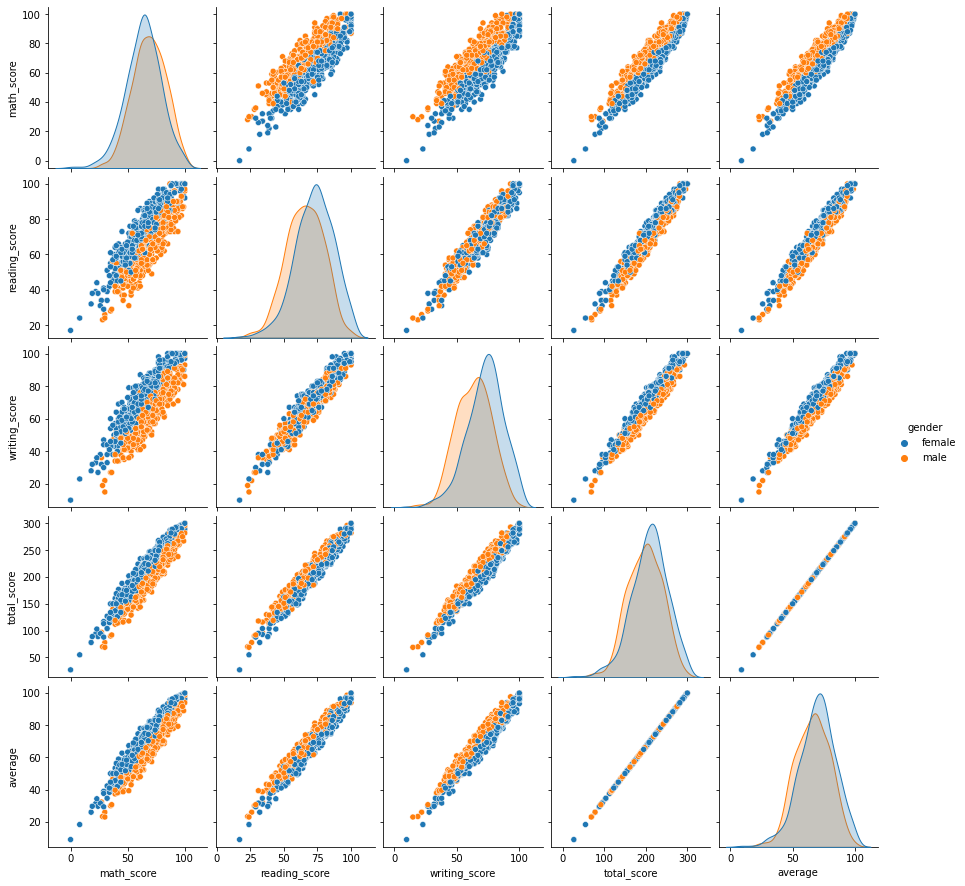

In [27]:
sns.pairplot(df,hue = 'gender')
plt.show()